## 資料前置處理

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
(x_img_train, y_label_train), \
(x_img_test, y_label_test) = cifar10.load_data()

In [3]:
print(f"train data: images:, {x_img_train.shape} labels: {y_label_train.shape}")
print(f"test data: images:, {x_img_test.shape} labels: {y_label_test.shape}")

train data: images:, (50000, 32, 32, 3) labels: (50000, 1)
test data: images:, (10000, 32, 32, 3) labels: (10000, 1)


In [4]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

## 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [7]:
model = Sequential()

In [8]:
model.add(Conv2D(filters = 32,
                 kernel_size = (3, 3),
                 input_shape = (32, 32, 3),
                 activation = 'relu',
                 padding = 'same'))

In [9]:
model.add(Dropout(0.25))

In [10]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [11]:
model.add(Conv2D(filters=64,
                 kernel_size = (3,3),
                 activation = 'relu',
                 padding = 'same'))

In [12]:
model.add(Dropout(0.25))

In [13]:
model.add(MaxPooling2D(pool_size = (2, 2)))

In [14]:
model.add(Flatten())
model.add(Dropout(0.25))

In [15]:
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(rate = 0.25))

In [16]:
model.add(Dense(10, activation = 'softmax'))

In [17]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)             

In [18]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [19]:
train_history = model.fit(x_img_train_normalize,
                          y_label_train_OneHot,
                          validation_split = 0.2, 
                          epochs = 5,
                          batch_size = 128,
                          verbose = 2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/5
 - 46s - loss: 1.5193 - accuracy: 0.4502 - val_loss: 1.3066 - val_accuracy: 0.5738
Epoch 2/5
 - 46s - loss: 1.1593 - accuracy: 0.5871 - val_loss: 1.1400 - val_accuracy: 0.6349
Epoch 3/5
 - 46s - loss: 1.0046 - accuracy: 0.6464 - val_loss: 1.0474 - val_accuracy: 0.6547
Epoch 4/5
 - 45s - loss: 0.8985 - accuracy: 0.6842 - val_loss: 0.9500 - val_accuracy: 0.6916
Epoch 5/5
 - 46s - loss: 0.8134 - accuracy: 0.7119 - val_loss: 0.8997 - val_accuracy: 0.7038


In [20]:
import matplotlib.pyplot as plt
def show_train_history(train_history,
                       train,
                       validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

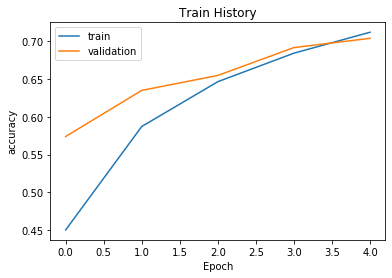

In [21]:
show_train_history(train_history, 'accuracy', 'val_accuracy')

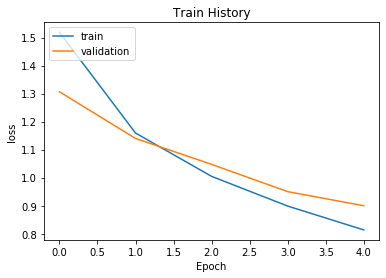

In [22]:
show_train_history(train_history, 'loss', 'val_loss')

In [23]:
scores = model.evaluate(x_img_test_normalize,
                        y_label_test_OneHot,
                        verbose = 0)
scores[1]

0.7020000219345093

In [24]:
prediction = model.predict_classes(x_img_test_normalize)

In [25]:
prediction[:10]

array([3, 8, 8, 8, 6, 6, 1, 4, 3, 1], dtype=int64)

In [26]:
def plot_images_labels_prediction(images, 
                                  labels,
                                  prediction,
                                  idx,
                                  num = 10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25: 
        num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, i+1)
        ax.imshow(images[idx], cmap = 'binary')
        title = f"label = {labels[idx]}"
        if len(prediction) > 0:
            title += f", predict = {prediction[idx]}"
            
        ax.set_title(title, fontsize = 12)
        ax.set_xticks([]); ax.set_yticks([])
        idx += 1
    plt.show()

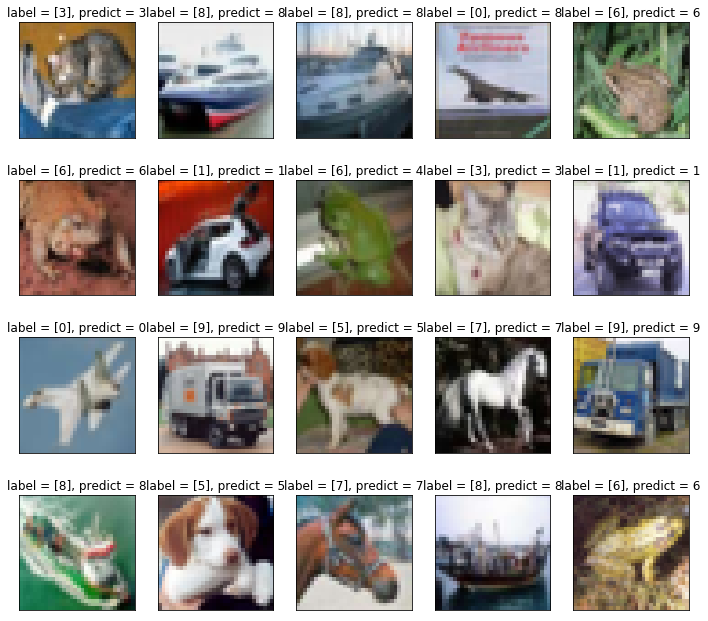

In [32]:
plot_images_labels_prediction(x_img_test, 
                              y_label_test,
                              prediction,
                              0,
                              20)

In [28]:
Predicted_Probability = model.predict(x_img_test_normalize)

In [29]:
def show_Predicted_Probability(y,
                               prediction,
                               x_img,
                               Predicted_Probability,
                               i):
    print(f'label: {label_dict[y[i][0]]} predict {label_dict[prediction[i]]}')
    plt.figure(figsize = (2, 2))
    plt.imshow(np.reshape(x_img_test[i], (32, 32, 3)))
    plt.show()
    for j in range(10):
        print(f"{label_dict[j]} Probability:{Predicted_Probability[i][j]:1.9f}")

In [30]:
label_dict = {0: "airplane", 
              1: "automobile", 
              2: "bird", 
              3: "cat", 
              4: "deer",
              5: "dog",
              6: "frog",
              7: "horse",
              8: "ship",
              9: "truck",
             }

label: horse predict horse


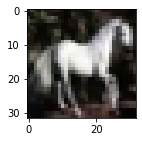

airplane Probability:0.004954158
automobile Probability:0.001405559
bird Probability:0.031142183
cat Probability:0.020729652
deer Probability:0.040107049
dog Probability:0.107741214
frog Probability:0.024885686
horse Probability:0.763441443
ship Probability:0.001550797
truck Probability:0.004042366


In [33]:
show_Predicted_Probability(y_label_test,
                           prediction,
                           x_img_test,
                           Predicted_Probability,
                           13)

label: airplane predict airplane


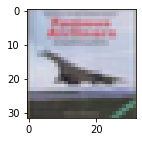

airplane Probability:0.908318639
automobile Probability:0.020692920
bird Probability:0.007566276
cat Probability:0.000955154
deer Probability:0.000475746
dog Probability:0.000000201
frog Probability:0.000002843
horse Probability:0.000017823
ship Probability:0.061787192
truck Probability:0.000183063


In [98]:
show_Predicted_Probability(y_label_test,
                           prediction,
                           x_img_test,
                           Predicted_Probability,
                           3)

In [99]:
prediction.shape

(10000,)

In [100]:
y_label_test.shape

(10000, 1)

In [101]:
y_label_test.reshape(-1)

array([3, 8, 8, ..., 5, 1, 7])

In [102]:
import pandas as pd
print(label_dict)
pd.crosstab(y_label_test.reshape(-1),
            prediction,
            rownames = ['label'],
            colnames = ['predict'])

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,796,22,34,15,15,9,9,8,58,34
1,15,868,4,6,1,3,5,1,21,76
2,63,6,617,69,78,51,60,35,15,6
3,19,14,70,544,60,156,82,28,7,20
4,19,3,62,74,661,41,65,60,9,6
5,14,5,39,176,37,634,37,42,11,5
6,5,7,31,49,21,22,847,7,8,3
7,19,4,16,37,47,54,10,797,3,13
8,47,29,11,7,9,7,5,5,855,25


In [103]:
model = Sequential()

In [104]:
model.add(Conv2D(filters = 32,
                 kernel_size = (3,3),
                 input_shape = (32, 32, 3),
                 activation = 'relu',
                 padding = 'same'))
model.add(Dropout(0.3))
model.add(Conv2D(filters = 32,
                 kernel_size = (3,3),
                 activation = 'relu',
                 padding = 'same'))
model.add(MaxPooling2D(pool_size = (2, 2)))

In [105]:
model.add(Conv2D(filters = 64,
                 kernel_size = (3,3),
                 activation = 'relu',
                 padding = 'same'))
model.add(Dropout(0.3))
model.add(Conv2D(filters = 64,
                 kernel_size = (3,3),
                 activation = 'relu',
                 padding = 'same'))
model.add(MaxPooling2D(pool_size = (2, 2)))

In [106]:
model.add(Conv2D(filters = 128,
                 kernel_size = (3,3),
                 activation = 'relu',
                 padding = 'same'))
model.add(Dropout(0.3))
model.add(Conv2D(filters = 128,
                 kernel_size = (3,3),
                 activation = 'relu',
                 padding = 'same'))
model.add(MaxPooling2D(pool_size = (2, 2)))

In [107]:
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(2500, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(2500, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation = 'softmax'))

In [108]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [46]:
for i in range(10):
    try:
        model.load_weights("SaveModel/cifarCnnModel.h5")
        print("Loading Model is success, Keep training Model")
    except:
        print("Loading Model is failure, train new Model")
    train_history = model.fit(x_img_train_normalize,
                              y_label_train_OneHot,
                              validation_split = 0.2,
                              epochs = 5,
                              batch_size = 300,
                              verbose = 1)
    model.save_weights("SaveModel/cifarCnnModel.h5")
    print("Save model to disk")

Loading Model is success, Keep training Model
Train on 40000 samples, validate on 10000 samples
Epoch 1/5
40000/40000 [==============================] - 104s 3ms/step - loss: 0.4735 - accuracy: 0.8287 - val_loss: 0.6798 - val_accuracy: 0.7728
Epoch 2/5
40000/40000 [==============================] - 105s 3ms/step - loss: 0.4384 - accuracy: 0.8443 - val_loss: 0.6482 - val_accuracy: 0.7815
Epoch 3/5
40000/40000 [==============================] - 104s 3ms/step - loss: 0.3965 - accuracy: 0.8559 - val_loss: 0.7065 - val_accuracy: 0.7773
Epoch 4/5
40000/40000 [==============================] - 105s 3ms/step - loss: 0.3725 - accuracy: 0.8662 - val_loss: 0.7022 - val_accuracy: 0.7749
Epoch 5/5
40000/40000 [==============================] - 105s 3ms/step - loss: 0.3443 - accuracy: 0.8748 - val_loss: 0.6879 - val_accuracy: 0.7752
Save model to disk
Loading Model is success, Keep training Model
Train on 40000 samples, validate on 10000 samples
Epoch 1/5
40000/40000 [==============================]

40000/40000 [==============================] - 104s 3ms/step - loss: 0.1272 - accuracy: 0.9574 - val_loss: 0.8069 - val_accuracy: 0.7860
Epoch 5/5
40000/40000 [==============================] - 104s 3ms/step - loss: 0.1431 - accuracy: 0.9522 - val_loss: 0.8067 - val_accuracy: 0.7867
Save model to disk
